In [18]:
#@title **Cargar librerias**

import os
import shutil
import random
import imageio
from itertools import chain

import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm_notebook, tnrange
from IPython.display import HTML

from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from keras.optimizers import *
from keras.models import *
from keras.layers import *
from keras.callbacks import *
from keras.layers import *
from keras.preprocessing.image import ImageDataGenerator

In [19]:
#@title Definir las rutas del dataset 

# Definimos las rutas del dataset 
Datos_Originales = 'Datos\Data'
directorio_base = 'Datos\Datos_Filtrados'
directorio_final= 'Datos\Datos_Generados'


contenido = os.listdir(Datos_Originales)

nombres = [elemento for elemento in contenido if os.path.isdir(os.path.join(Datos_Originales, elemento))]

print("Carpetas en la carpeta {}: {}".format(Datos_Originales, nombres))


# Lista de nombres
#nombres = [
#    "Amanita_citrina",    "Amanita_muscaria",    "Amanita_pantherina",    "Amanita_rubescens",    "Apioperdon_pyriforme",    "Armillaria_borealis",    "Artomyces_pyxidatus",    "Bjerkandera_adusta",
#    "Boletus_edulis",    "Boletus_reticulatus"
#]




Carpetas en la carpeta Datos\Data: ['Familia_Amanita', 'Familia_Boletus', 'Familia_Cladonia', 'Familia_Coprinellus', 'Familia_Daedaleopsis', 'Familia_Ervenia', 'Familia_Formitopsis', 'Familia_Gyromitra', 'Familia_Hypholoma', 'Familia_Lactarius', 'Familia_Leccinum', 'Familia_Peltigera', 'Familia_Phellinus', 'Familia_Pholiota', 'Familia_Suillus', 'Familia_Trametes']


In [8]:
nombres

['Familia_Amanita',
 'Familia_Boletus',
 'Familia_Cladonia',
 'Familia_Coprinellus',
 'Familia_Daedaleopsis',
 'Familia_Ervenia',
 'Familia_Formitopsis',
 'Familia_Gyromitra',
 'Familia_Hypholoma',
 'Familia_Lactarius',
 'Familia_Leccinum',
 'Familia_Peltigera',
 'Familia_Phellinus',
 'Familia_Pholiota',
 'Familia_Suillus',
 'Familia_Trametes']

Datos\Datos_Generados\Familia_Boletus


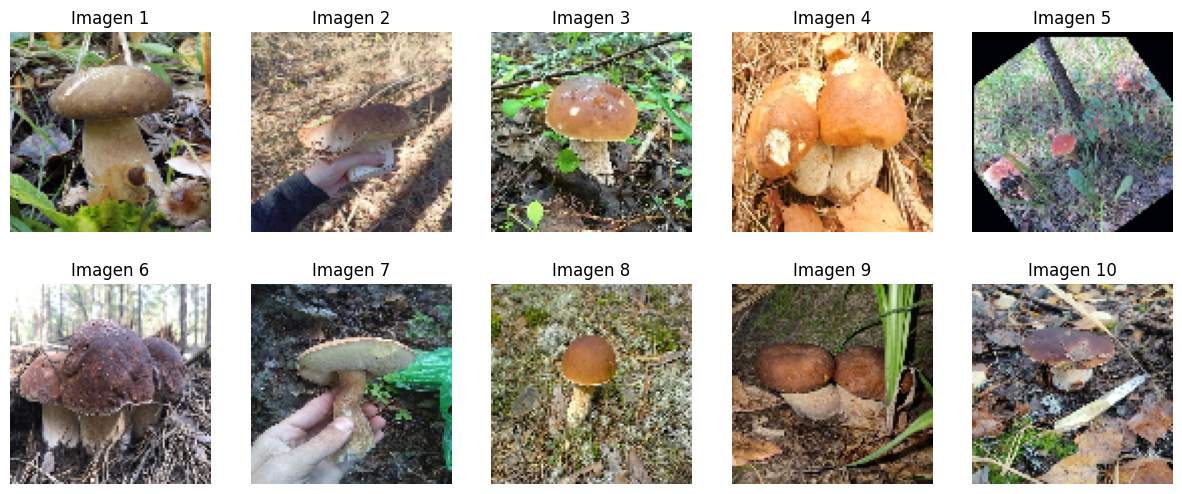

In [3]:
#@title Ajustar tamaño Individual

#Carpeta origen
carpeta_imagenes = os.path.join(directorio_final, nombres[1])
print(carpeta_imagenes)

# Lista de todas las imágenes en la carpeta
imagenes = [f for f in os.listdir(carpeta_imagenes) if os.path.isfile(os.path.join(carpeta_imagenes, f))]

# Selecciona 10 imágenes al azar
imagenes_seleccionadas = random.sample(imagenes, 10)

# Configura el tamaño del subplot
plt.figure(figsize=(15, 6))

# Itera sobre las imágenes seleccionadas y las muestra en un subplot
for i, imagen in enumerate(imagenes_seleccionadas, 1):
    ruta_imagen = os.path.join(carpeta_imagenes, imagen)
    plt.subplot(2, 5, i)  # Subplot de 2 filas y 5 columnas
    img = mpimg.imread(ruta_imagen)
    res = cv2.resize(img, dsize=(100,100), interpolation=cv2.INTER_CUBIC)
    plt.imshow(res)
    plt.axis('off')  # Desactiva los ejes
    plt.title(f'Imagen {i}')

# Muestra el conjunto de imágenes seleccionadas
plt.show()


In [5]:
#@title Guardar imágenes en listas con  Padding

directorio = directorio_final
#directorio = directorio_base

imagenes = []
etiquetas = []

# Relleno deseado
padding_size = 1

for nombre in nombres[:10]:

    directorio_actual = os.path.join(directorio, nombre)
    cont = 0

    for archivo in os.listdir(directorio_actual):
        
        if archivo.endswith(".jpg"):
            
            ruta_imagen = os.path.join(directorio_actual, archivo)
            imagen = cv2.imread(ruta_imagen)

            # Redimensiona la imagen a 100x100 píxeles
            imagen_redimensionada = cv2.resize(imagen, (100, 100))

            # Agrega relleno a la imagen
            imagen_con_relleno = cv2.copyMakeBorder(imagen_redimensionada, padding_size, padding_size, padding_size, padding_size, cv2.BORDER_CONSTANT)

            # Agrega la imagen y la etiqueta a las listas
            imagenes.append(imagen_con_relleno)
            etiquetas.append(nombres.index(nombre))  # Usa el índice del nombre como etiqueta
            cont = cont + 1


    print(f"Nombre: {nombre}, Número de imágenes: {cont}, Número de etiquetas: {cont}")
print(f"Total de imagenes de prueba: {len(imagenes)}")


Nombre: Familia_Amanita, Número de imágenes: 800, Número de etiquetas: 800
Nombre: Familia_Boletus, Número de imágenes: 800, Número de etiquetas: 800
Nombre: Familia_Cladonia, Número de imágenes: 800, Número de etiquetas: 800
Nombre: Familia_Coprinellus, Número de imágenes: 800, Número de etiquetas: 800
Nombre: Familia_Daedaleopsis, Número de imágenes: 800, Número de etiquetas: 800
Nombre: Familia_Ervenia, Número de imágenes: 800, Número de etiquetas: 800
Nombre: Familia_Formitopsis, Número de imágenes: 800, Número de etiquetas: 800
Nombre: Familia_Gyromitra, Número de imágenes: 800, Número de etiquetas: 800
Nombre: Familia_Hypholoma, Número de imágenes: 800, Número de etiquetas: 800
Nombre: Familia_Lactarius, Número de imágenes: 800, Número de etiquetas: 800
Total de imagenes de prueba: 8000


In [6]:
# Convierte las listas a arrays numpy
imagenes = np.array(imagenes)
etiquetas = np.array(etiquetas)


In [7]:
# Divide el conjunto de datos en entrenamiento y validación
x_train, x_test, y_train, y_test = train_test_split(imagenes, etiquetas, test_size=0.2, random_state=42)

In [8]:
#@title Preparar imágenes

imagenes_copia = imagenes
etiquetas_copia = etiquetas

In [30]:
#@title Respaldo **Solo en caso de emergencias**

imagenes = imagenes_copia
etiquetas = etiquetas_copia

In [9]:
#@title Mostrar Tamaños
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])
print('Number of images in y_train', y_train.shape)
print('Number of images in y_test',  y_test.shape)

x_train shape: (6400, 102, 102, 3)
Number of images in x_train 6400
Number of images in x_test 1600
Number of images in y_train (6400,)
Number of images in y_test (1600,)


In [10]:
#@title Normalizar datos

# Asegúrate de que las imágenes tengan un rango entre 0 y 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convierte las etiquetas a formato one-hot
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)


print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('')
print('Number of images in x_train', x_train.shape[0])
print('Number of images in y_train', y_train.shape)
print('')
print('Number of images in x_test', x_test.shape[0])
print('Number of images in y_test',  y_test.shape)

x_train shape: (6400, 102, 102, 3)
y_train shape: (6400, 10)

Number of images in x_train 6400
Number of images in y_train (6400, 10)

Number of images in x_test 1600
Number of images in y_test (1600, 10)


Pruebas Modelo Referencia

In [11]:
#@title **Modelo Referencia** 10 Familias de hongos

import time

model_2 = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(102, 102, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),

    
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),


    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', bias_initializer='he_uniform', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')

])

model_2.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 102, 102, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 102, 102, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 51, 51, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 51, 51, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 51, 51, 64)        256       
 chNormalization)                                                
                                                        

In [18]:
#@title **Modelo Referencia**

opt = tf.keras.optimizers.SGD(learning_rate=0.0001)
model_2.compile(optimizer=opt, loss='categorical_crossentropy',metrics=['accuracy'])

# Registra el tiempo de inicio
start_time = time.time()

# Fit the model
earlystopper = EarlyStopping(patience=5, start_from_epoch=5 , verbose=1)
checkpointer = ModelCheckpoint('Prueba_1.h5', verbose=1, save_best_only=True)

history_2 = model_2.fit(x_train, y_train,
                      epochs = 50,
                      batch_size = 16,
                      callbacks=[earlystopper, checkpointer],
                      validation_data = (x_test, y_test))


# Registra el tiempo de finalización
end_time = time.time()

# Calcula el tiempo de ejecución
execution_time = (end_time - start_time)/60

print(f"Tiempo de ejecución: {execution_time} min")

Epoch 1/50
400/400 [==============================] - ETA: 0s - loss: 2.8221 - accuracy: 0.1533
Epoch 1: val_loss improved from inf to 2.30845, saving model to Prueba_1.h5


e:\Programas\miniconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


400/400 [==============================] - 81s 200ms/step - loss: 2.8221 - accuracy: 0.1533 - val_loss: 2.3085 - val_accuracy: 0.1637
Epoch 2/50
400/400 [==============================] - ETA: 0s - loss: 2.2534 - accuracy: 0.2205
Epoch 2: val_loss improved from 2.30845 to 2.05469, saving model to Prueba_1.h5
400/400 [==============================] - 80s 200ms/step - loss: 2.2534 - accuracy: 0.2205 - val_loss: 2.0547 - val_accuracy: 0.2663
Epoch 3/50
400/400 [==============================] - ETA: 0s - loss: 2.1068 - accuracy: 0.2628
Epoch 3: val_loss improved from 2.05469 to 1.97429, saving model to Prueba_1.h5
400/400 [==============================] - 84s 209ms/step - loss: 2.1068 - accuracy: 0.2628 - val_loss: 1.9743 - val_accuracy: 0.3075
Epoch 4/50
400/400 [==============================] - ETA: 0s - loss: 2.0052 - accuracy: 0.2928
Epoch 4: val_loss improved from 1.97429 to 1.90864, saving model to Prueba_1.h5
400/400 [==============================] - 83s 208ms/step - loss: 2.00

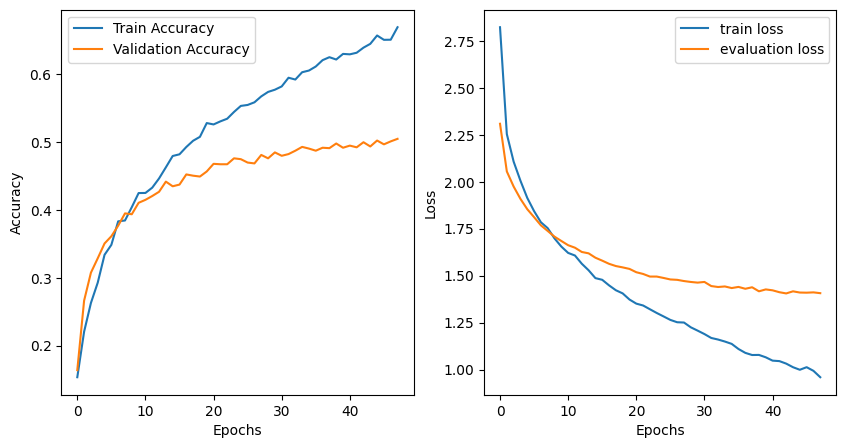

In [19]:
#@title Graficas Entrenamiento Modelo Simple

# Plot the loss and accuracy
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(history_2.history['accuracy'], label='Train Accuracy');
ax.plot(history_2.history['val_accuracy'], label='Validation Accuracy');
ax.set_xlabel('Epochs');
ax.set_ylabel('Accuracy');
ax.legend();

ax = fig.add_subplot(1, 2, 2)
ax.plot(history_2.history['loss'], label='train loss');
ax.plot(history_2.history['val_loss'], label='evaluation loss');
ax.legend();
ax.set_xlabel('Epochs');
ax.set_ylabel('Loss');